# diabates prediction using pima dataset


In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dia = pd.read_csv("diabetes.csv")

In [3]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dia.shape

(768, 9)

In [8]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dups = dia.duplicated()


print("the no of duplicated are ", dups.sum(),dia[dups])

the no of duplicated are  0 Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


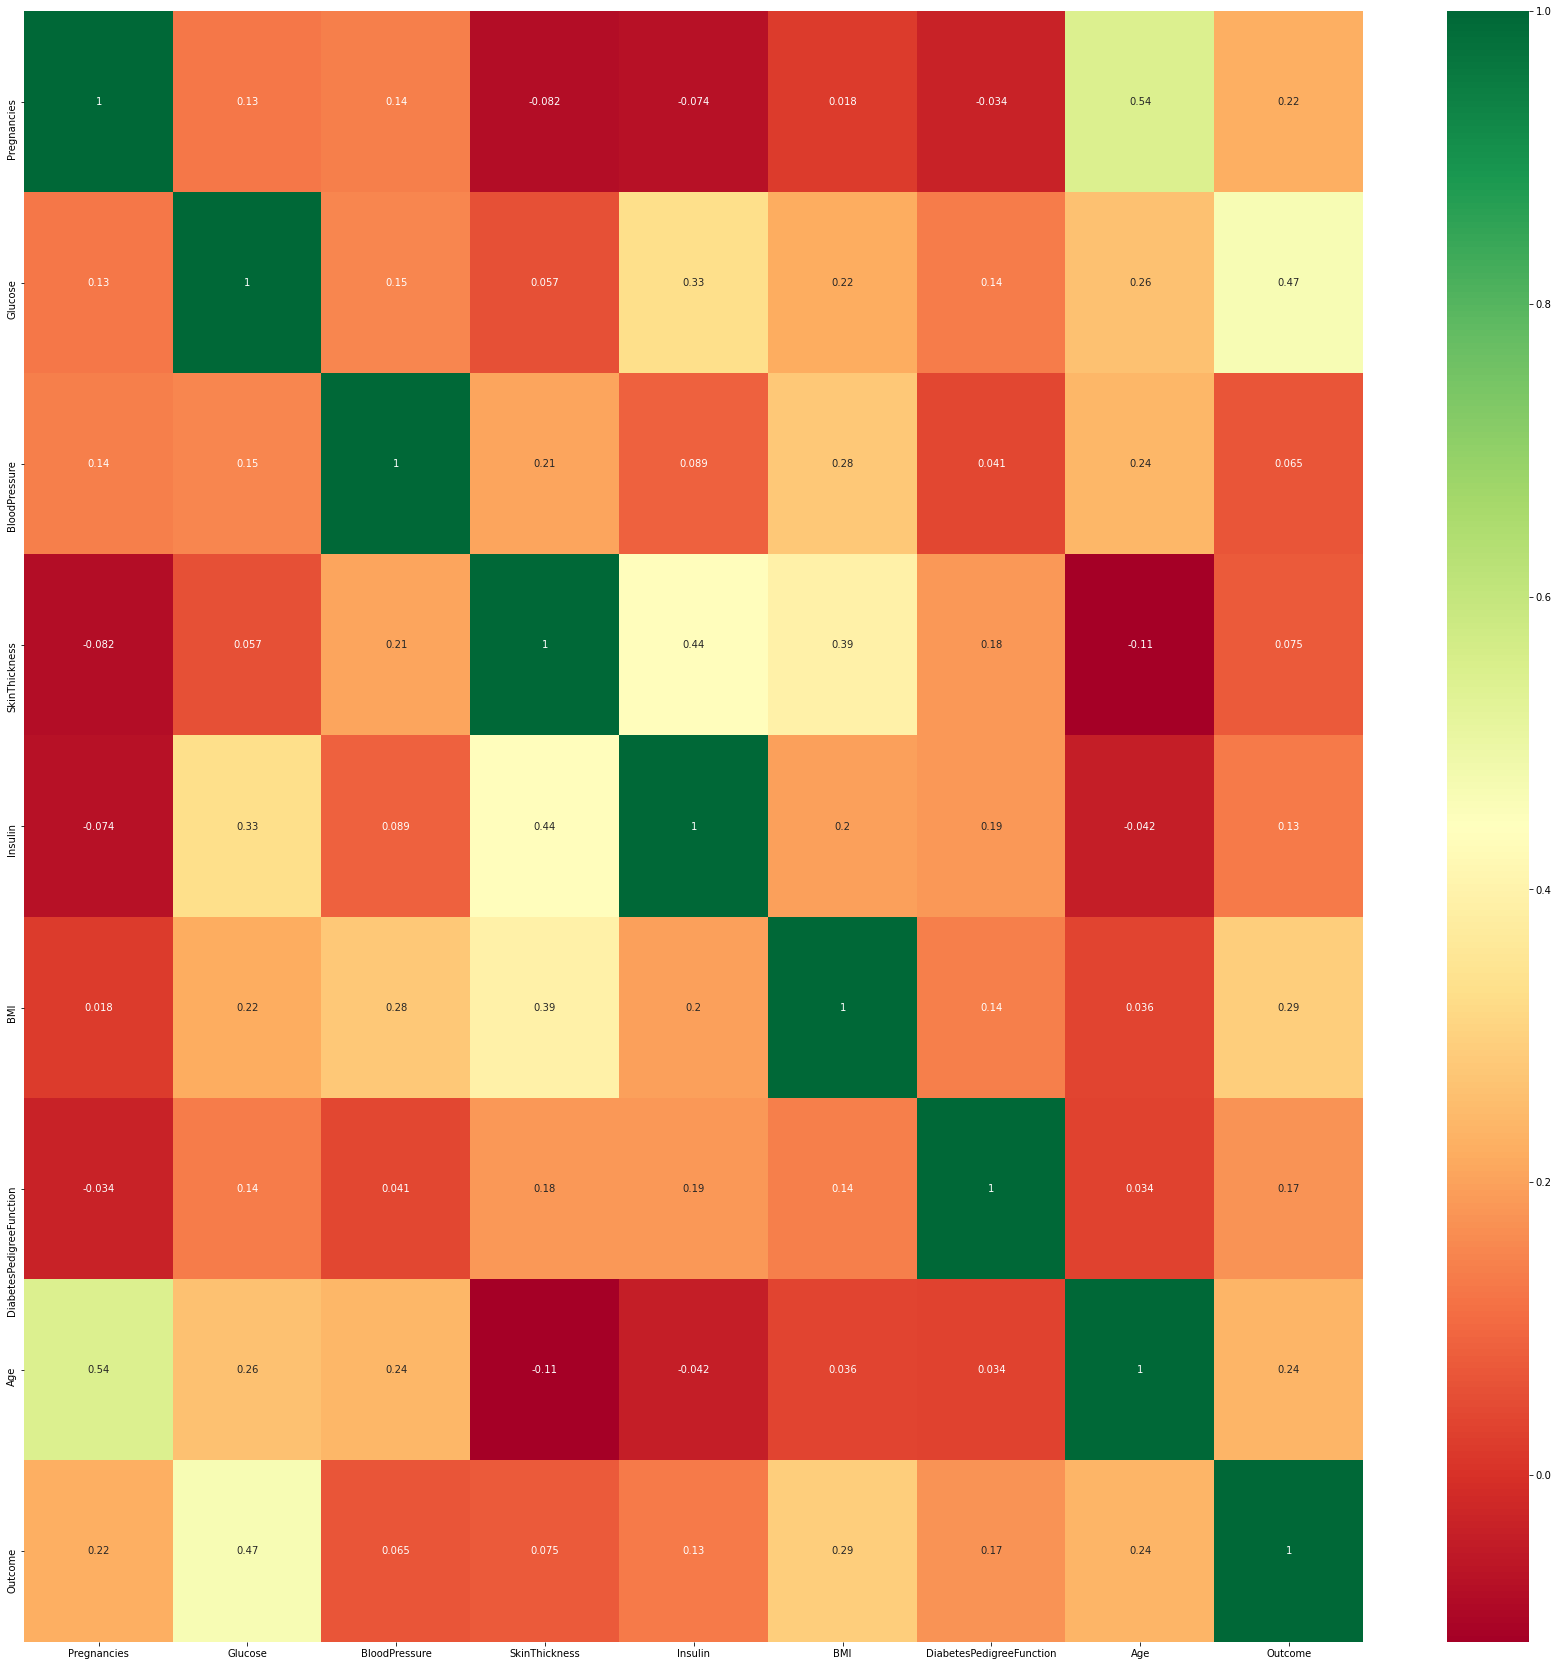

In [15]:
corrmat = dia.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))

##plot heat map of features
g=sns.heatmap(dia[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
dia.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:ylabel='Outcome'>

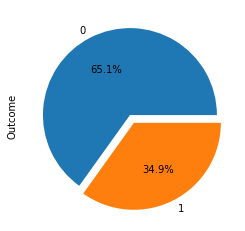

In [21]:
dia['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moin\ANCONDA\lib\site-packages\

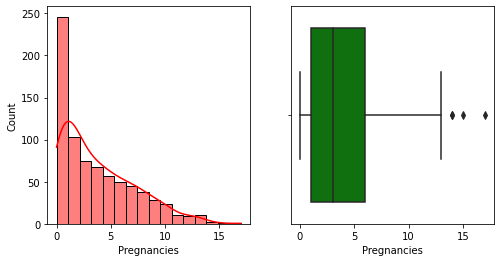

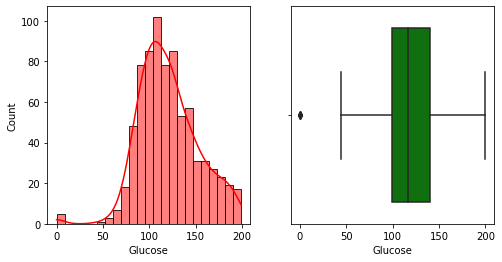

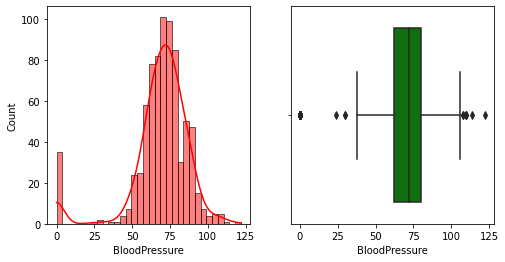

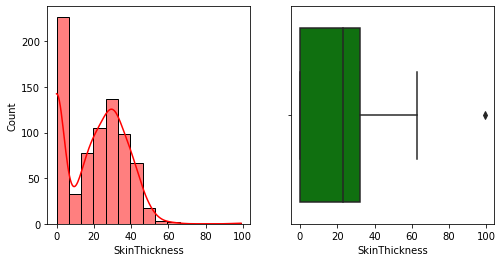

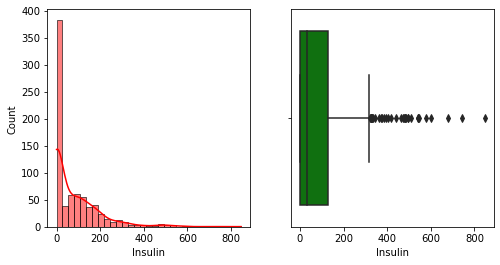

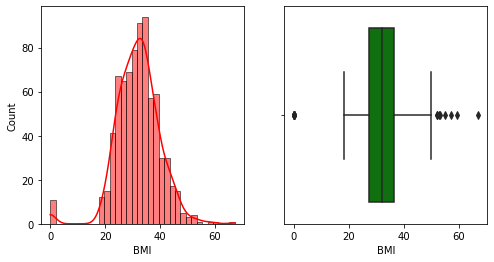

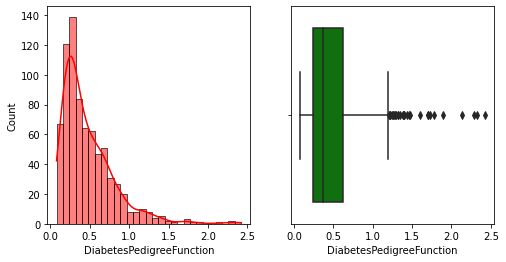

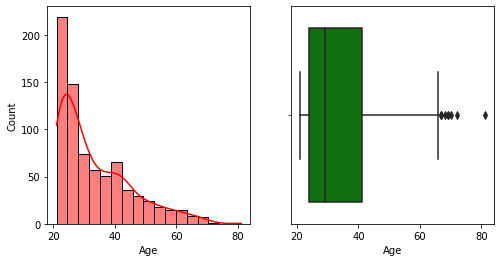

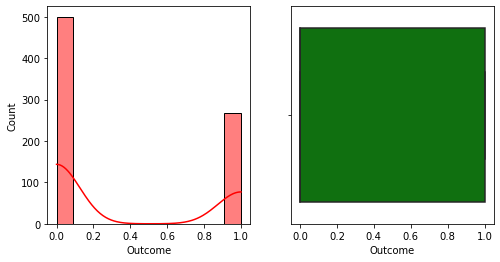

In [24]:
for i in dia.columns:
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    sns.histplot(dia[i],kde=True,ax=axes[0],color='red')
    sns.boxplot(dia[i],ax=axes[1],color='green')

In [26]:
dia.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

### There are some outliners and the same would be treated accordingly.  Skewness is not observed in continous variable


#### checking fro zero values in Dataset

In [29]:
for i in dia.columns:
    print("Number of zeros in column" ,i, dia[(dia[i]==0)][i].count())

Number of zeros in column Pregnancies 111
Number of zeros in column Glucose 5
Number of zeros in column BloodPressure 35
Number of zeros in column SkinThickness 227
Number of zeros in column Insulin 374
Number of zeros in column BMI 11
Number of zeros in column DiabetesPedigreeFunction 0
Number of zeros in column Age 0
Number of zeros in column Outcome 500


#### We observe that there are some zeros in the columns like Glucose, BloodPressure, Skinthikness,Insulin, BMI.


##### We can update these records with median values of the respective features

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


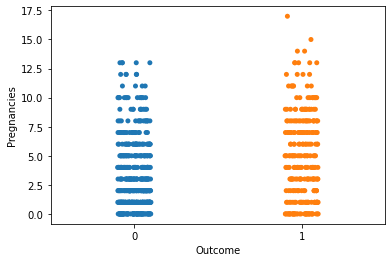

In [30]:
sns.stripplot(dia['Outcome'], dia['Pregnancies'], jitter=True)
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


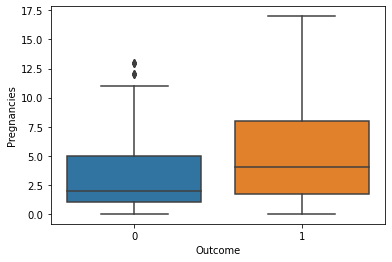

In [31]:
sns.boxplot(dia['Outcome'],dia["Pregnancies"])
plt.show()

<AxesSubplot:ylabel='Frequency'>

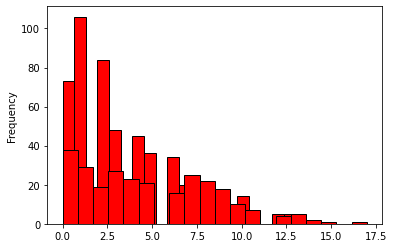

In [33]:
dia[dia["Outcome"]==0].Pregnancies.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].Pregnancies.plot.hist(bins=20,edgecolor='black',color='red')

#### we can observe from the above box plot and stripplot that the higher the no.of pregnancies the more are the riske of diabetes

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


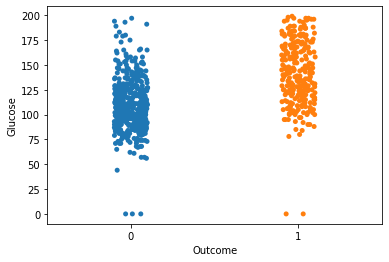

In [34]:
sns.stripplot(dia["Outcome"],dia["Glucose"],jitter=True)
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


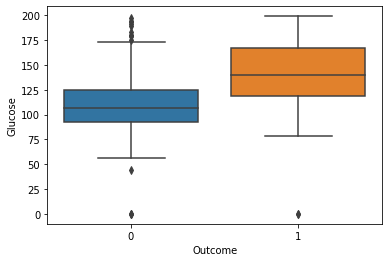

In [36]:
sns.boxplot(dia["Outcome"],dia["Glucose"])
plt.show()

<AxesSubplot:ylabel='Frequency'>

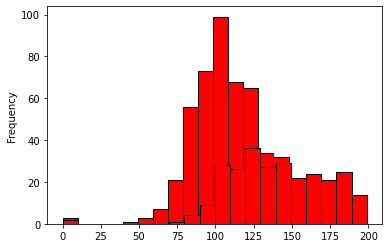

In [37]:
dia[dia["Outcome"]==0].Glucose.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].Glucose.plot.hist(bins=20,edgecolor='black',color='red')

##### From the above stripplot and boxblot we can see that the higher the glucose thr higher the chance of getting diabetes

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


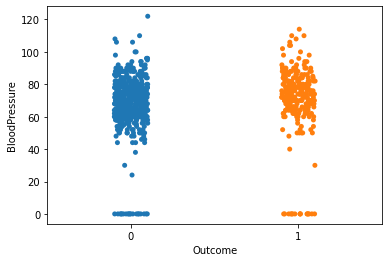

In [38]:
sns.stripplot(dia["Outcome"],dia["BloodPressure"], jitter=True)
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


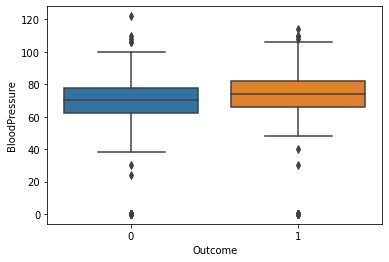

In [39]:
sns.boxplot(dia["Outcome"],dia["BloodPressure"])
plt.show()

<AxesSubplot:ylabel='Frequency'>

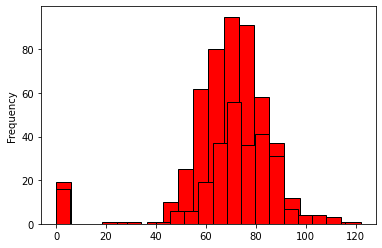

In [41]:
dia[dia["Outcome"]==0].BloodPressure.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].BloodPressure.plot.hist(bins=20,edgecolor='black',color='red')

##### By observing both the plot we can say that the probabilty of diabetes is higher when Bloodpressure is higher

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


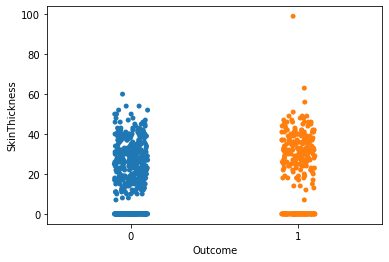

In [42]:
sns.stripplot(dia["Outcome"],dia['SkinThickness'],jitter=True)
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

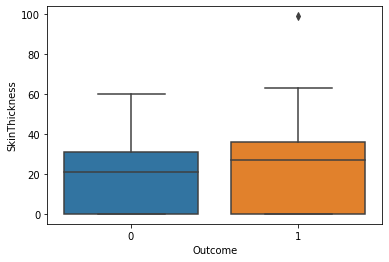

In [43]:
sns.boxplot(dia["Outcome"],dia["SkinThickness"])

<AxesSubplot:ylabel='Frequency'>

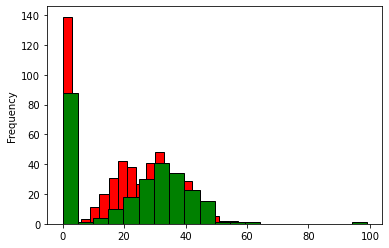

In [45]:
dia[dia["Outcome"]==0].SkinThickness.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].SkinThickness.plot.hist(bins=20,edgecolor='black',color='green')

#### relation of Skin thickness of patients with diabetes mellitus has been described controversially by scientists.
##### we observe that Skinthickness is slightly higher for diabetic patient

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


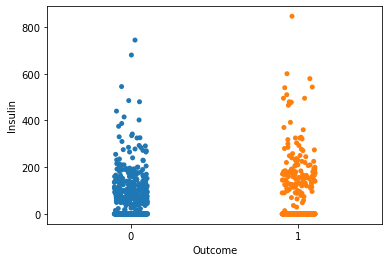

In [46]:
sns.stripplot(dia["Outcome"],dia["Insulin"],jitter=True)
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


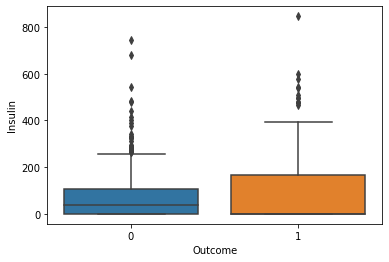

In [47]:
sns.boxplot(dia["Outcome"],dia["Insulin"])
plt.show()

<AxesSubplot:ylabel='Frequency'>

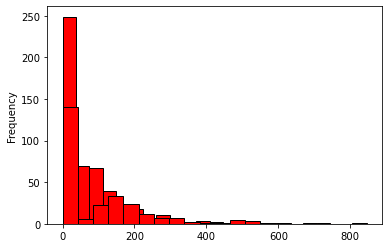

In [49]:
dia[dia["Outcome"]==0].Insulin.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].Insulin.plot.hist(bins=20,edgecolor='black',color='red')

#### Looking at both plots nothing could be intrepreted we need to look at this feature in more detail

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


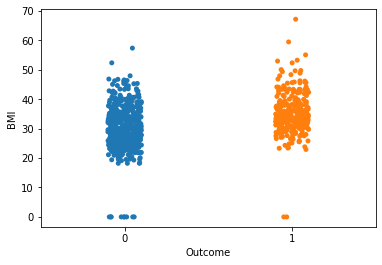

In [50]:
sns.stripplot(dia["Outcome"], dia['BMI'], jitter=True)  
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


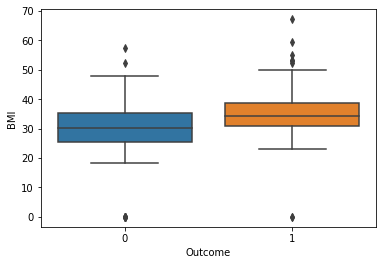

In [51]:
sns.boxplot(dia["Outcome"],dia['BMI']) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

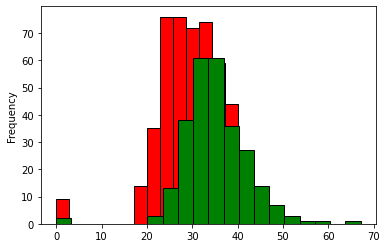

In [52]:
dia[dia["Outcome"]==0].BMI.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].BMI.plot.hist(bins=20,edgecolor='black',color='green')

##### We observe that higher the BMI more the chances of diabetes.


##### Higher BMI means higher body fat and Unhealty diet

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


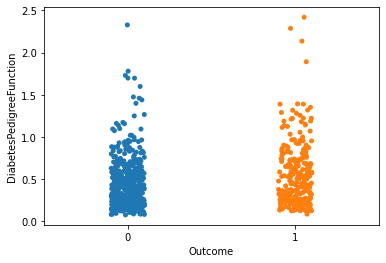

In [53]:
sns.stripplot(dia["Outcome"], dia['DiabetesPedigreeFunction'], jitter=True)  ### Distribution of values
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


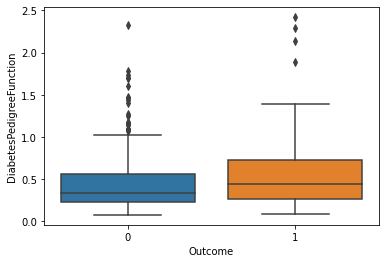

In [54]:
sns.boxplot(dia["Outcome"],dia['DiabetesPedigreeFunction']) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

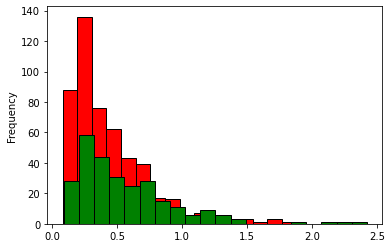

In [55]:
dia[dia["Outcome"]==0].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor='black',color='green')

#### We observe that diabetic people have higher DiabetesPedigreeFunction value i,e genetic influence plays some role in the Diabetes among patients.


##### DiabetesPedigreeFunction - This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


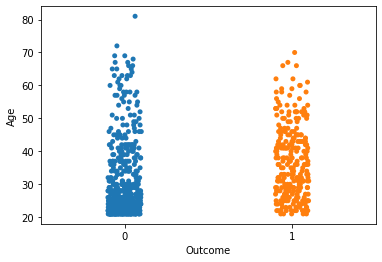

In [56]:
sns.stripplot(dia["Outcome"], dia['Age'], jitter=True)  
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


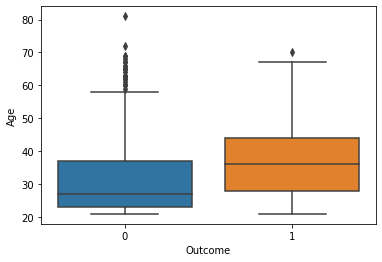

In [57]:
sns.boxplot(dia["Outcome"],dia['Age']) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

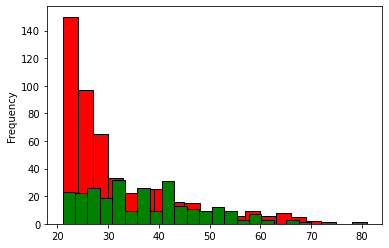

In [58]:
dia[dia["Outcome"]==0].Age.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].Age.plot.hist(bins=20,edgecolor='black',color='green')

#### we observe that there is less chance of diabetes among young people and more chances for the people above the Age of years

# Data Cleaning




### some features contain 0,it doesn't make sense here and this indicates missing value below we must replace 0 value by NaN

In [59]:
dia[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dia[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [60]:
dia.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

###  We replace the NUll values with median as all the variable contain outliers

In [61]:
for i in dia[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]:
    dia[i]=dia[i].fillna(dia[i].median())

In [62]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
## summary
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Performing Multivariate Analysis post treatment of Null values

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


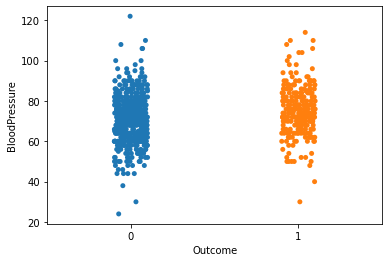

In [64]:
sns.stripplot(dia["Outcome"], dia['BloodPressure'], jitter=True)  
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


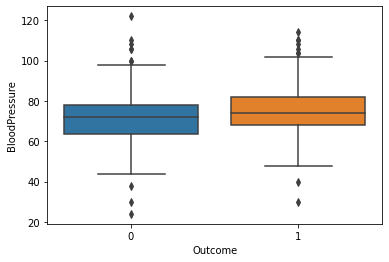

In [65]:
sns.boxplot(dia["Outcome"],dia["BloodPressure"])
plt.show()

<AxesSubplot:ylabel='Frequency'>

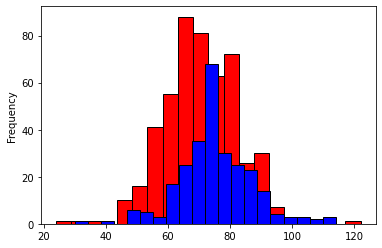

In [82]:
dia[dia["Outcome"]==0].BloodPressure.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].BloodPressure.plot.hist(bins=20,edgecolor='black',color='blue')

### After correcting the null values it is clear that the higher the BloodPressure higher the chances of Diabetes

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


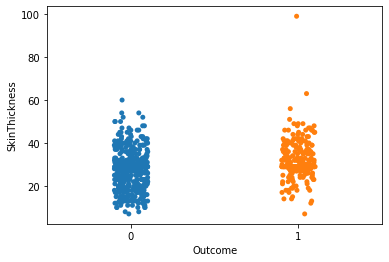

In [67]:
sns.stripplot(dia["Outcome"], dia['SkinThickness'], jitter=True)  
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


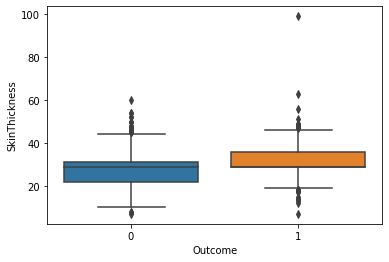

In [68]:
sns.boxplot(dia["Outcome"],dia['SkinThickness']) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

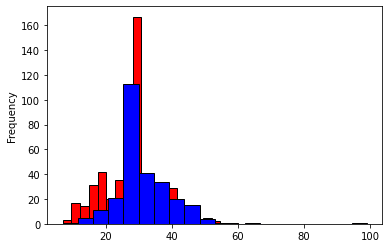

In [81]:
dia[dia["Outcome"]==0].SkinThickness.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].SkinThickness.plot.hist(bins=20,edgecolor='black',color='blue')

#### Post correcting the Null values it is more Evident now that higher the SkinThickness more the chances of diabetes.

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


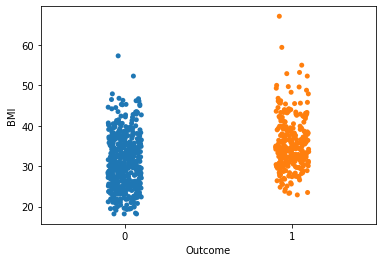

In [70]:
sns.stripplot(dia["Outcome"], dia['BMI'], jitter=True)  
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


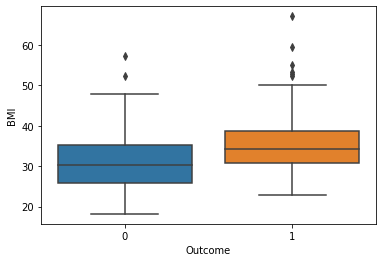

In [71]:
sns.boxplot(dia["Outcome"],dia['BMI']) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

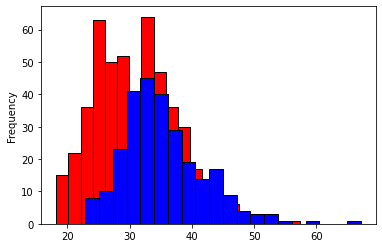

In [80]:
dia[dia["Outcome"]==0].BMI.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].BMI.plot.hist(bins=20,edgecolor='black',color='blue')

#### Post correcting the Null values it is more Evident now that higher the BMI more the chances of diabetes

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


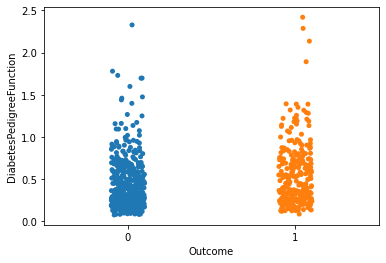

In [73]:
sns.stripplot(dia["Outcome"], dia['DiabetesPedigreeFunction'], jitter=True) 
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


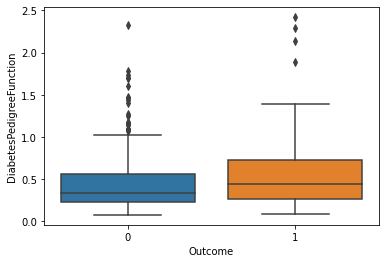

In [74]:
sns.boxplot(dia["Outcome"],dia['DiabetesPedigreeFunction']) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

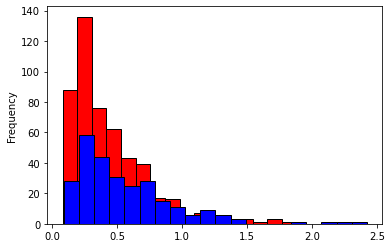

In [79]:
dia[dia["Outcome"]==0].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor='black',color='blue')

#### Post correcting the Null values it is more Evident now that higher the DiabetesPedigreeFunction more the chances of diabetes

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


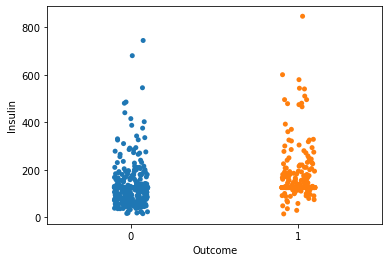

In [76]:
sns.stripplot(dia["Outcome"], dia['Insulin'], jitter=True)  
plt.show()

C:\Users\Moin\ANCONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


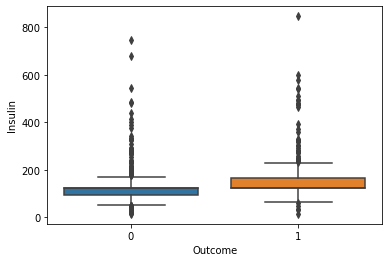

In [77]:
sns.boxplot(dia["Outcome"],dia['Insulin']) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

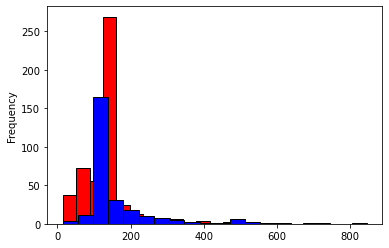

In [83]:
dia[dia["Outcome"]==0].Insulin.plot.hist(bins=20,edgecolor='black',color='red')
dia[dia["Outcome"]==1].Insulin.plot.hist(bins=20,edgecolor='black',color='blue')

#### Post correcting the Null values it is more Evident now that diabetic people are required to more insulin in order to keep the Glucose level lower.

In [84]:
# Looking at the Relation Between the Independent Variables

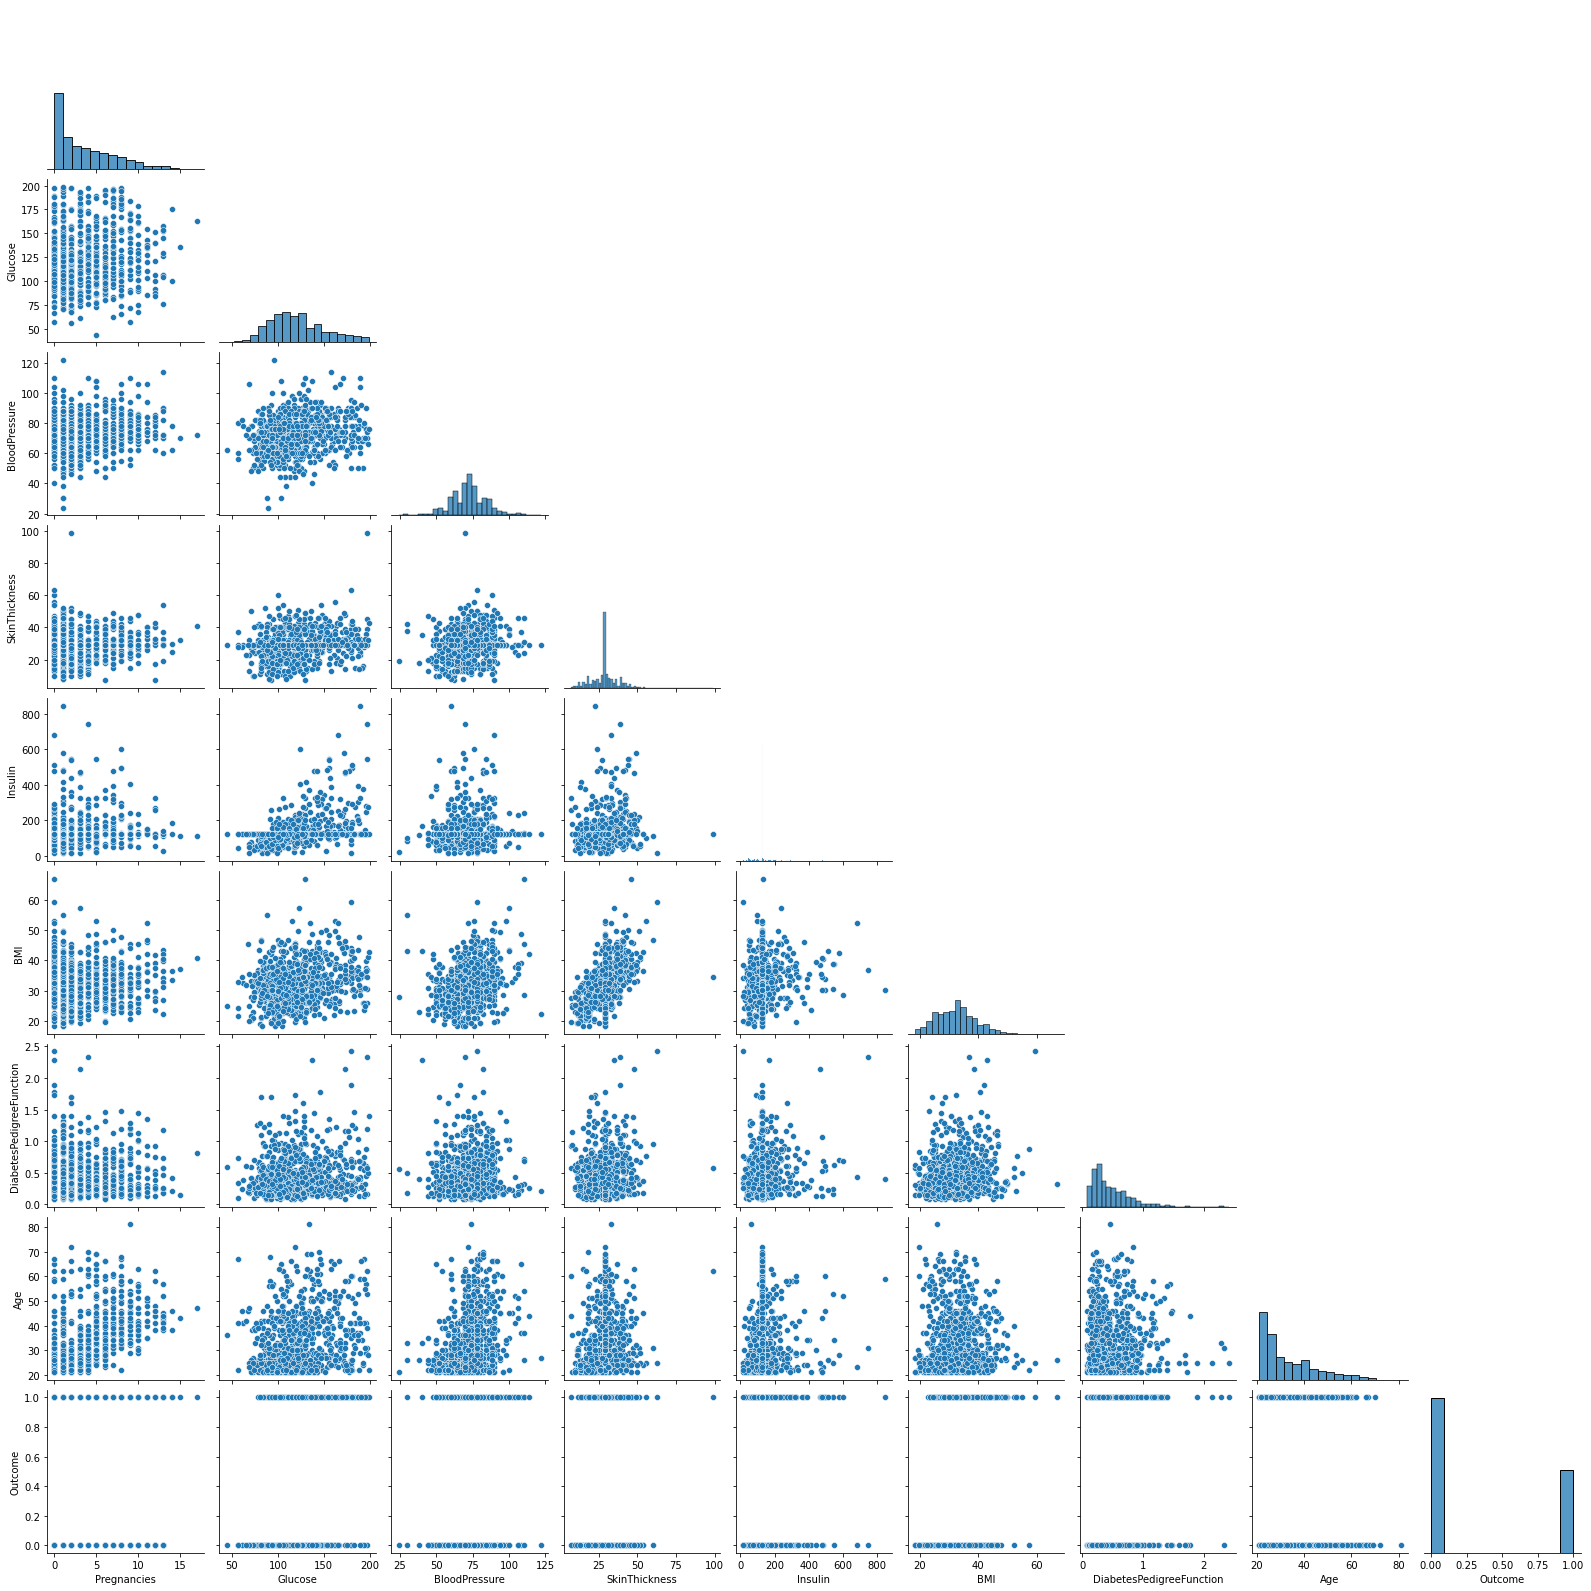

In [85]:
sns.pairplot(dia,corner=True)

<AxesSubplot:>

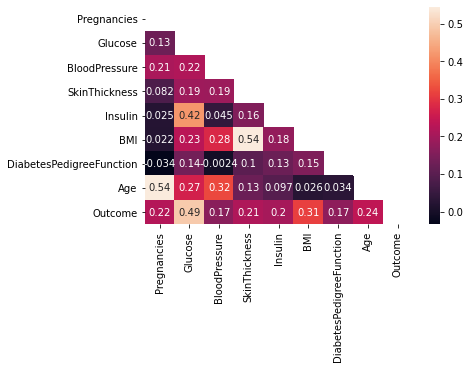

In [87]:
sns.heatmap(dia.corr(),mask=np.triu(dia.corr()),annot=True)

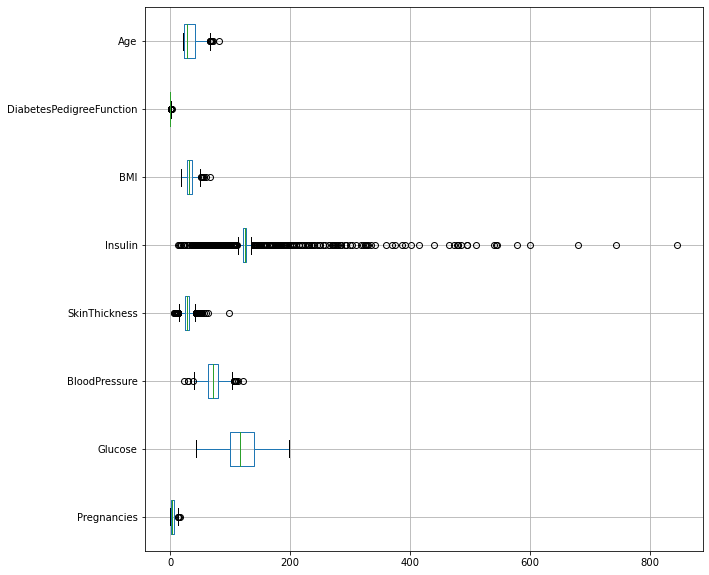

In [88]:
plt.figure(figsize=(10,10))
dia.iloc[:,:8].boxplot(vert=0)
plt.show()

In [92]:
dia.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
def Remove_Outlier (col):
    Q1,Q3 = np.percentile (col,[25,75])
    
    IQR= Q3-Q1
    
    upper_range =  Q3+(IQR*1.5)
    
    lower_range =  Q1-(IQR*1.5)
    
    return upper_range,lower_range

In [109]:
for i in dia[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]:
    ur,lr = Remove_Outlier(dia[i])
    dia[i]= np.where(dia[i]>ur,ur,dia[i])
    dia[i]= np.where(dia[i]<lr,lr,dia[i])
        

<AxesSubplot:>

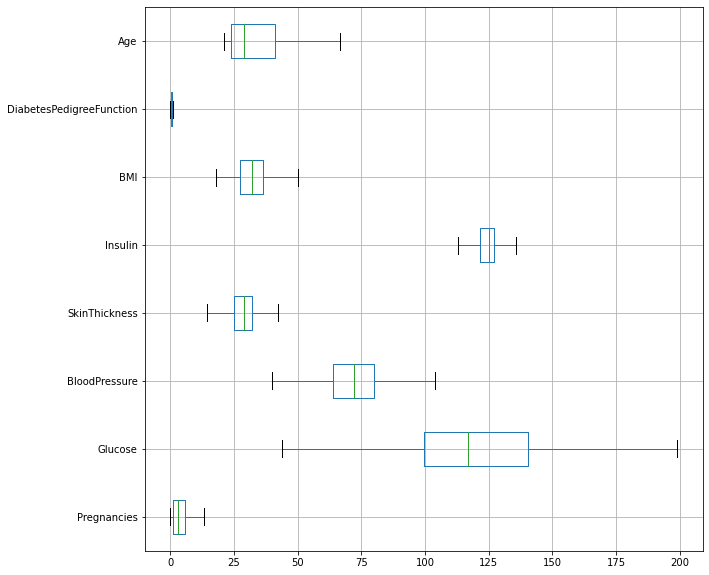

In [110]:
plt.figure(figsize=(10,10))
dia.iloc[:,:8].boxplot(vert=0)

# Scaling the Dataset

In [114]:
dia_New=dia

In [111]:
num=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [115]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(dia_New[num])

array([[ 0.64714967,  0.86604475, -0.03063207, ...,  0.18109219,
         0.58892732,  1.44569096],
       [-0.84896998, -1.20506583, -0.54391414, ..., -0.8694653 ,
        -0.37810147, -0.189304  ],
       [ 1.24559754,  2.01666174, -0.71500816, ..., -1.36472812,
         0.74659506, -0.10325164],
       ...,
       [ 0.34792574, -0.02157407, -0.03063207, ..., -0.92949716,
        -0.74949659, -0.27535637],
       [-0.84896998,  0.14279979, -1.05719621, ..., -0.34418655,
        -0.38510892,  1.18753386],
       [-0.84896998, -0.94206766, -0.20172609, ..., -0.29916266,
        -0.50423566, -0.87772293]])

In [ ]:
from sklearn.model_selection import train_test_split

In [116]:
X=dia_New.drop('Outcome',axis=1)
Y=dia_New.pop('Outcome')

### Spliting the Data Set between training and test Data

In [117]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,stratify=Y,random_state=0)

<IPython.core.display.Javascript object>

##### shape of training and test data

In [119]:
X_train.shape,X_test.shape

((537, 8), (231, 8))

# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='newton-cg',max_iter=1000)
lr_model= lr.fit(X_train,Y_train)

In [121]:
print('Accuracy on Training set',lr_model.score(X_train,Y_train))
print('Accuracy on Test set',lr_model.score(X_test,Y_test))

Accuracy on Training set 0.7728119180633147
Accuracy on Test set 0.7575757575757576


In [122]:
Y_train_lr_predict=lr_model.predict(X_train)
Y_test_lr_predict=lr_model.predict(X_test)

In [126]:
from sklearn import metrics

In [127]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_train,Y_train_lr_predict))
print('Classification Report_train','\n',metrics.classification_report(Y_train,Y_train_lr_predict))

Confussion Matrix 
 [[304  46]
 [ 76 111]]
Classification Report_train 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       350
           1       0.71      0.59      0.65       187

    accuracy                           0.77       537
   macro avg       0.75      0.73      0.74       537
weighted avg       0.77      0.77      0.77       537



In [128]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_test_lr_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_test,Y_test_lr_predict))

Confussion Matrix 
 [[130  20]
 [ 36  45]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



# Random forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=30,max_features='auto',max_depth=5)
rfcl.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=30)

In [131]:
print('Accuracy on training set',rfcl.score(X_train,Y_train))
print('Accuracy on test set',rfcl.score(X_test,Y_test))

Accuracy on training set 0.8566108007448789
Accuracy on test set 0.7835497835497836


In [132]:
Y_train_rfcl_predict=rfcl.predict(X_train)
Y_test_rfcl_predict=rfcl.predict(X_test)

In [133]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_train,Y_train_rfcl_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_train,Y_train_rfcl_predict))

Confussion Matrix 
 [[323  27]
 [ 50 137]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       350
           1       0.84      0.73      0.78       187

    accuracy                           0.86       537
   macro avg       0.85      0.83      0.84       537
weighted avg       0.86      0.86      0.85       537



In [134]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_test_rfcl_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_test,Y_test_rfcl_predict))

Confussion Matrix 
 [[135  15]
 [ 35  46]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       150
           1       0.75      0.57      0.65        81

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.78      0.78      0.78       231



## KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN_model=KNN.fit(X_train,Y_train)

In [136]:
print('Accuracy on training set',KNN_model.score(X_train,Y_train))
print('Accuracy on test set',KNN_model.score(X_test,Y_test))

Accuracy on training set 0.8081936685288641
Accuracy on test set 0.7186147186147186


In [137]:
Y_train_KNN_predict=KNN_model.predict(X_train)
Y_test_KNN_predict=KNN_model.predict(X_test)

In [138]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_train,Y_train_KNN_predict))
print('Classification Report_train','\n',metrics.classification_report(Y_train,Y_train_KNN_predict))

Confussion Matrix 
 [[302  48]
 [ 55 132]]
Classification Report_train 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       350
           1       0.73      0.71      0.72       187

    accuracy                           0.81       537
   macro avg       0.79      0.78      0.79       537
weighted avg       0.81      0.81      0.81       537



In [139]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_test_KNN_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_test,Y_test_KNN_predict))

Confussion Matrix 
 [[120  30]
 [ 35  46]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       150
           1       0.61      0.57      0.59        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.71      0.72      0.72       231



# Navie Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB_model=NB.fit(X_train,Y_train)

In [141]:
print('Accuracy on Training set',NB_model.score(X_train,Y_train))
print('Accuracy on test set',NB_model.score(X_test,Y_test))

Accuracy on Training set 0.7616387337057728
Accuracy on test set 0.7489177489177489


In [142]:
Y_train_NB_predict=NB_model.predict(X_train)
Y_test_NB_predict=NB_model.predict(X_test)

In [143]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_train,Y_train_NB_predict))
print('Classification Report_train','\n',metrics.classification_report(Y_train,Y_train_NB_predict))

Confussion Matrix 
 [[287  63]
 [ 65 122]]
Classification Report_train 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       350
           1       0.66      0.65      0.66       187

    accuracy                           0.76       537
   macro avg       0.74      0.74      0.74       537
weighted avg       0.76      0.76      0.76       537



In [144]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_test_NB_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_test,Y_test_NB_predict))

Confussion Matrix 
 [[124  26]
 [ 32  49]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.60      0.63        81

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



### We observe that Recall of all the models is low.



##### Recall (elsewhere 'sensitivity') is important when you really want to ensure you're definitely capturing positive cases, when the cost of missing a positive is more problematic than the cost of including a negative.



### Naive Bayes Gives the best Recall in this Case thus it is the best model.


In [148]:
pip install scikit-learn-0.23.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-learn-0.23.1
ERROR: No matching distribution found for scikit-learn-0.23.1
